<IPython.core.display.Javascript object>


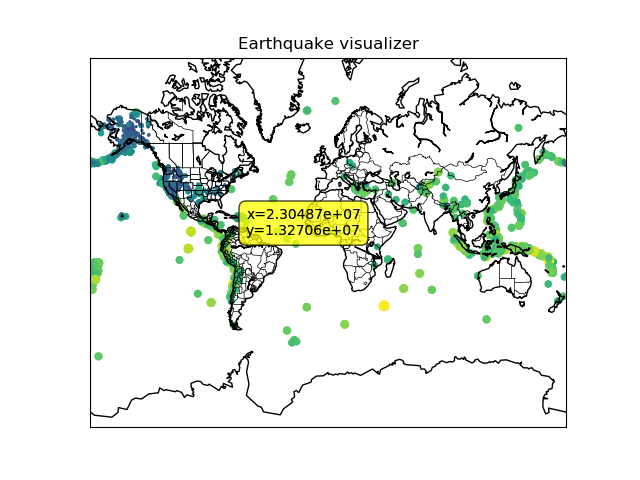

Button(description='Update', style=ButtonStyle())

In [18]:
%matplotlib notebook
#importing modules
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
#import matplotlib.animation as animation
import numpy as np
import pandas as pd
import mplcursors
import ipywidgets as widgets
from IPython.display import display
#creating basemap object
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawstates()

#m.shadedrelief()
def details(self):
    #reading the data set
    data = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv')
    #extracting information from data set
    lon = []
    for i in data['longitude']:
        lon.append(i)
    lat = []
    for i in data['latitude']:
        lat.append(i)
    #converting longitude ,laitude  to x ,y
    x,y = m(lon,lat)
    #different size of plot point 
    sizes = data['mag']**2
    #plotting the data
    m.scatter(x,y, marker='o',c=data['mag'] ,s= sizes,label=data['mag'])
    #showing annotation
    cursor = mplcursors.cursor(highlight = True)
    #changing default annotation 
    def change(sel):
        sel.annotation.set_text((data["place"][sel.target.index],data["mag"][sel.target.index],data["time"][sel.target.index])) 
        sel.annotation.arrow_patch.set(arrowstyle="simple", fc="white", alpha=.5)
        sel.annotation.get_bbox_patch().set(fc="white",alpha =1)
    cursor.connect("add",change)
details(m)
plt.title("Earthquake visualizer") 
button  = widgets.Button(description="Update")
display(button)
button.on_click(details)
plt.show()